In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Skyserver.csv")

In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
df.shape

(10000, 18)

In [5]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
#There isn't any null value in the df
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [7]:
columns_to_drop = ["objid", "specobjid", "rerun", "camcol", "field", "run","fiberid"]

In [8]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922


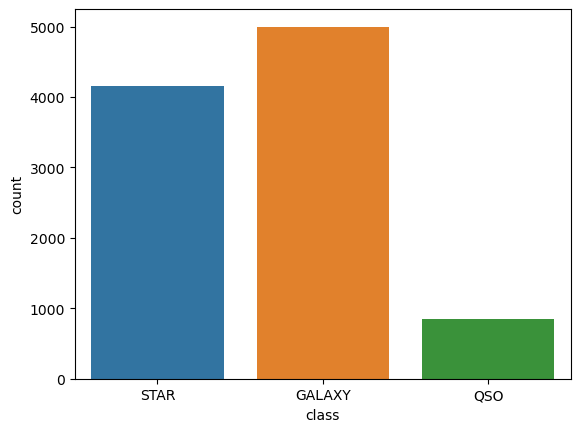

In [10]:
sns.countplot(x=df["class"],hue=df["class"])
plt.show()

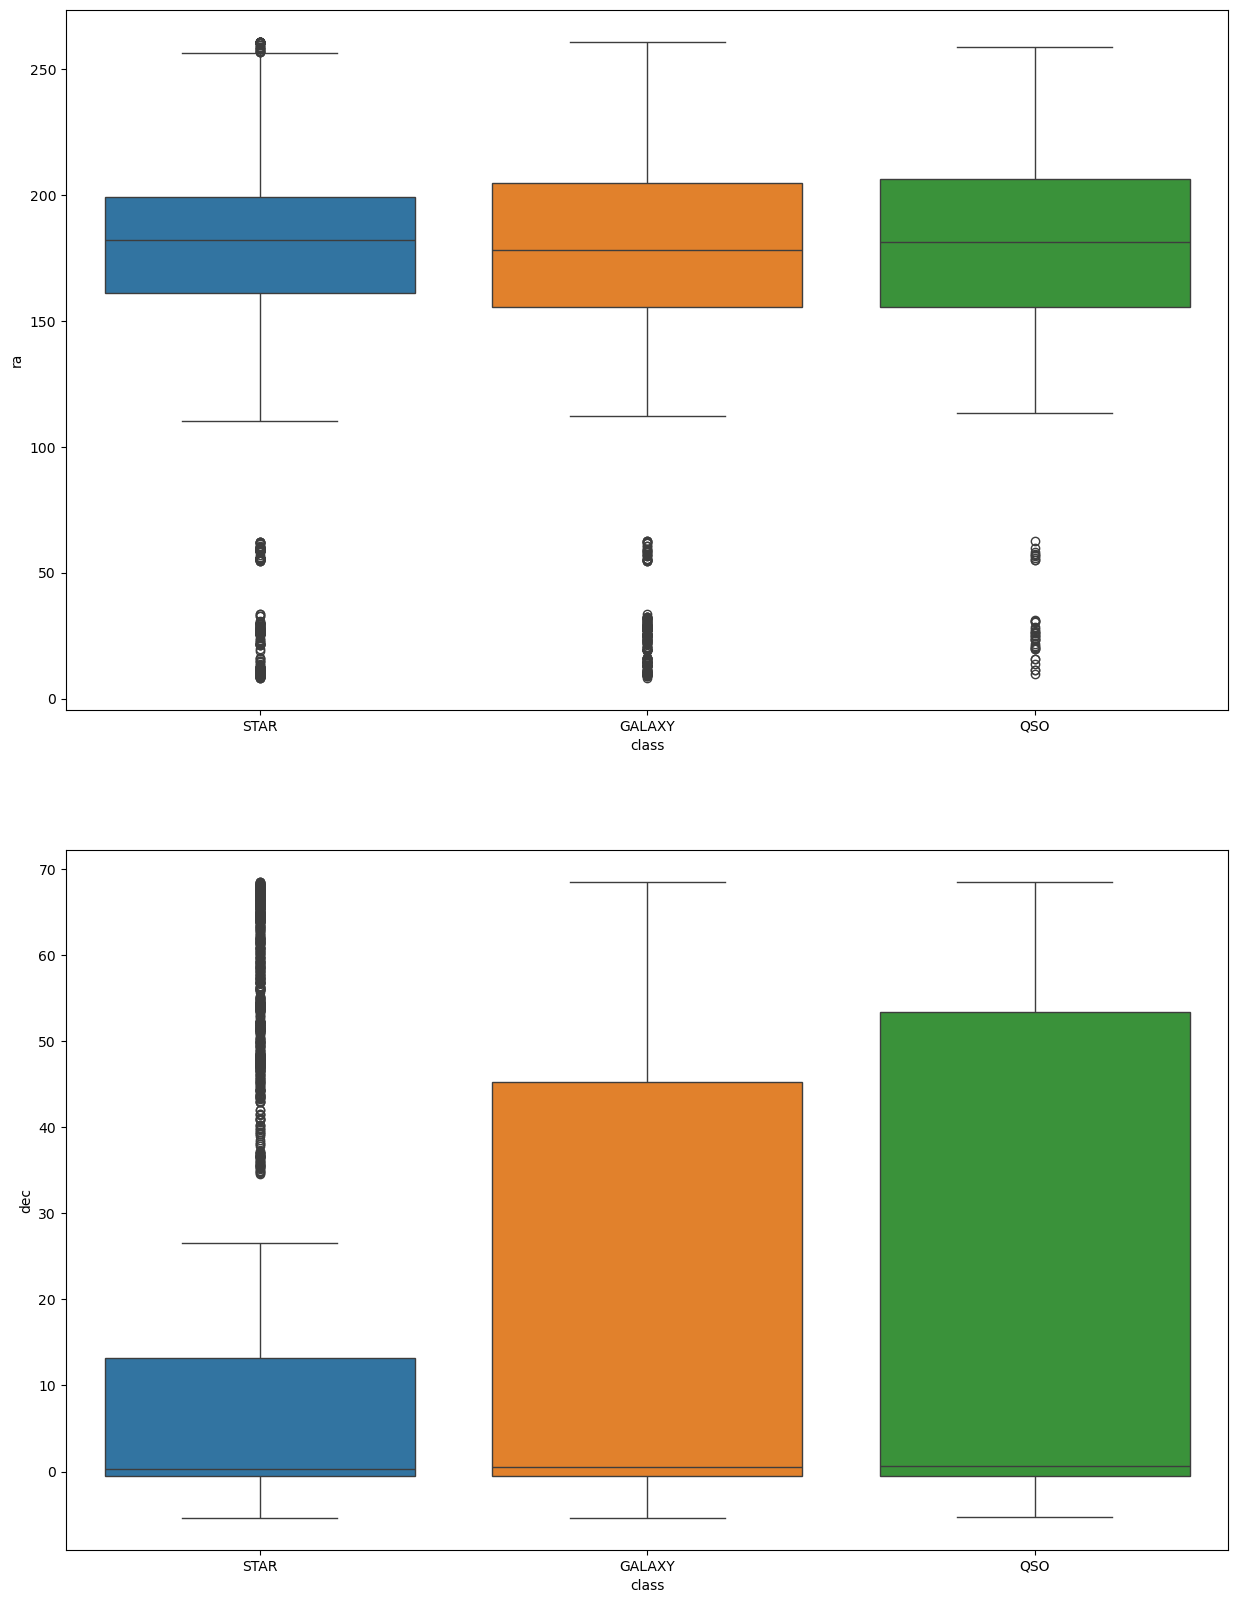

In [11]:
f, axes = plt.subplots(2, 1, figsize=(15, 20))
sns.boxplot(x='class', y='ra', data=df, ax=axes[0],hue="class")
sns.boxplot(x='class', y='dec', data=df, ax=axes[1],hue="class")
plt.show()


In [12]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])

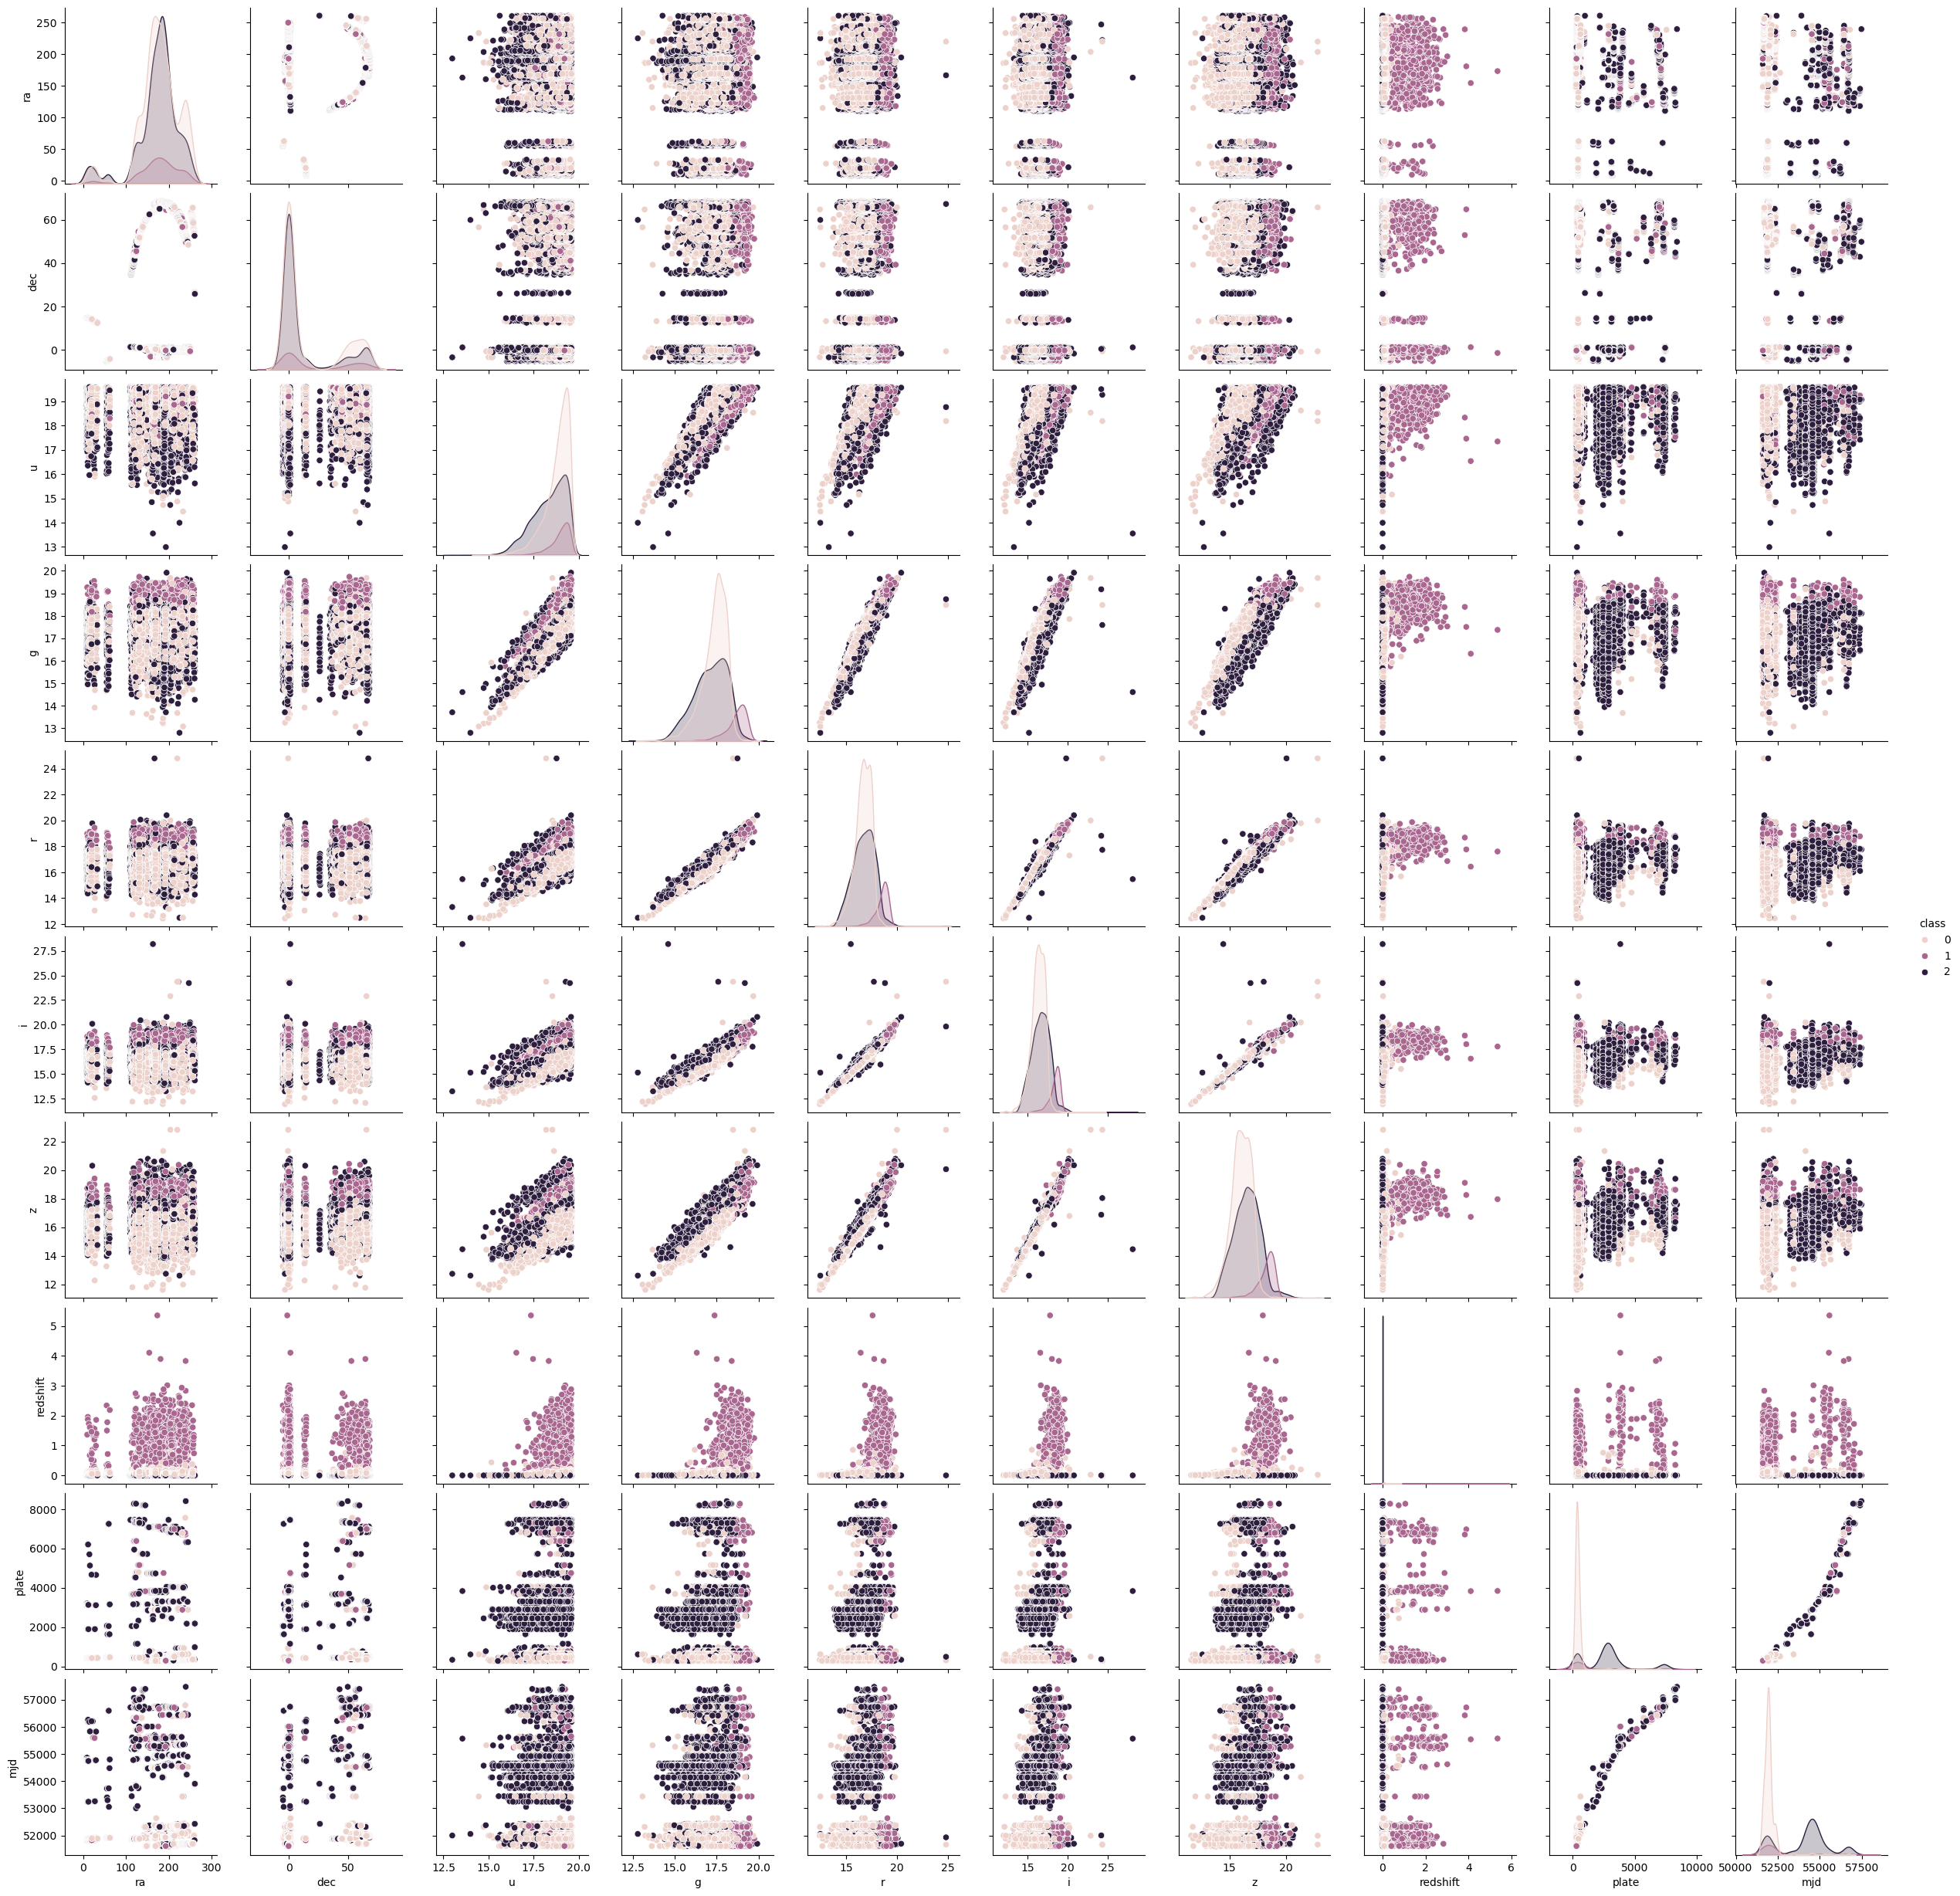

In [13]:
sns.pairplot(df, hue="class")
plt.show()

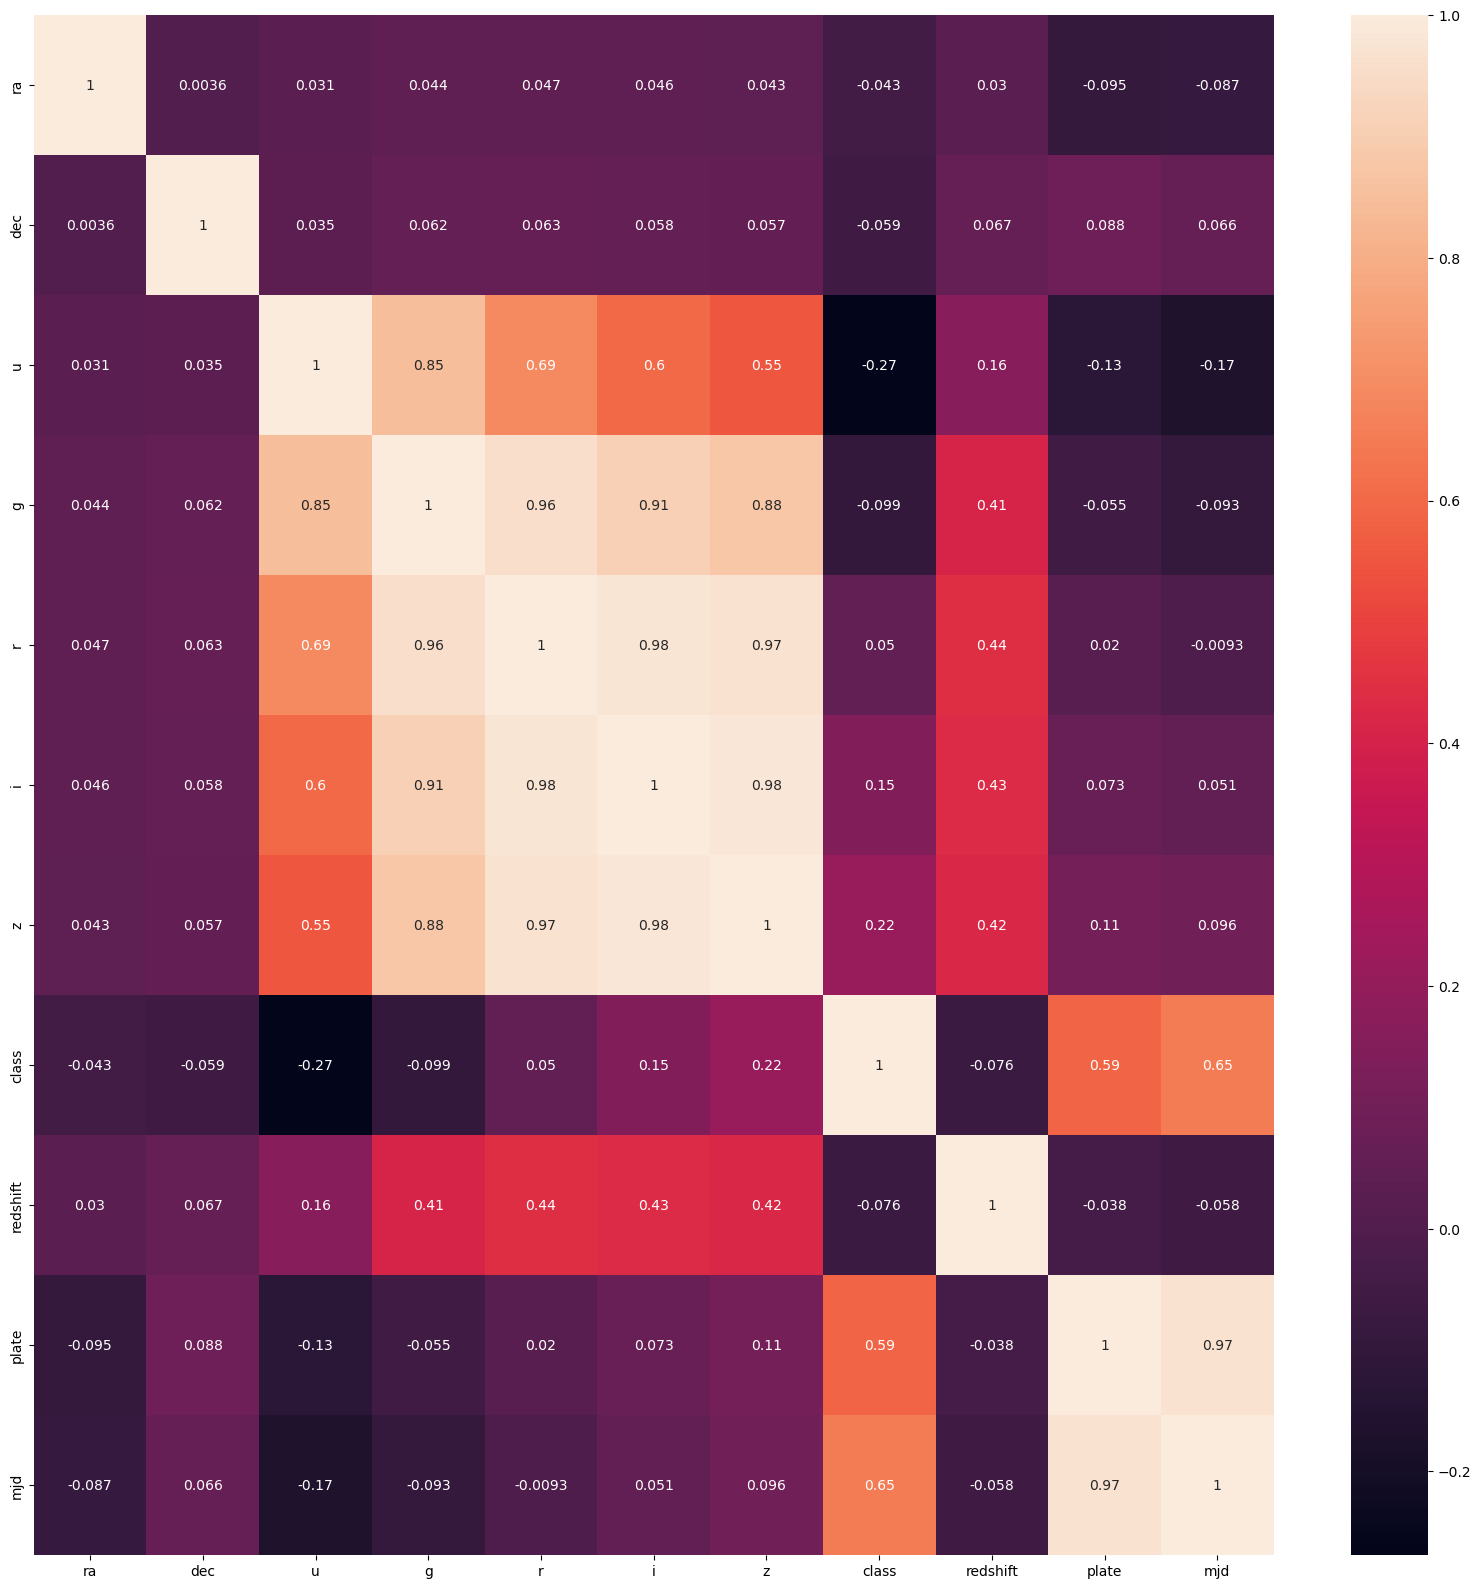

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

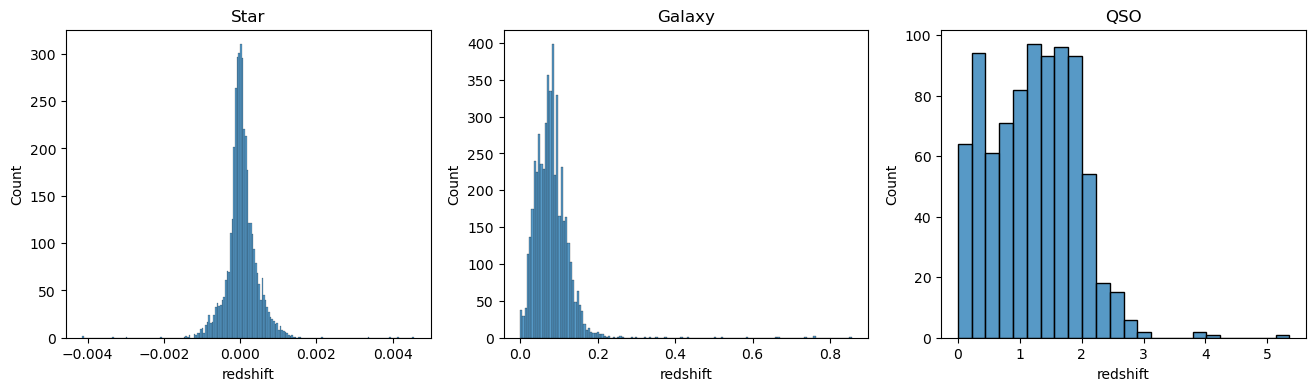

In [15]:
fig, axes = plt.subplots(nrows=1, ncols= 3, figsize=(16,4))
ax = sns.histplot(df[df["class"] == 2].redshift, ax = axes[0])
ax.set_title("Star")
ax = sns.histplot(df[df["class"] == 0].redshift, ax = axes[1])
ax.set_title("Galaxy")
ax = sns.histplot(df[df["class"] == 1].redshift, ax = axes[2])
ax.set_title("QSO")
plt.show()

In [16]:
X = df.drop("class", axis=1)
y = df["class"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 15)

In [18]:
from xgboost import XGBClassifier

In [19]:
xgb = XGBClassifier(n_estimators = 100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [20]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy score:  0.9875757575757576
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1687
           1       0.95      0.93      0.94       271
           2       0.99      1.00      1.00      1342

    accuracy                           0.99      3300
   macro avg       0.98      0.97      0.98      3300
weighted avg       0.99      0.99      0.99      3300



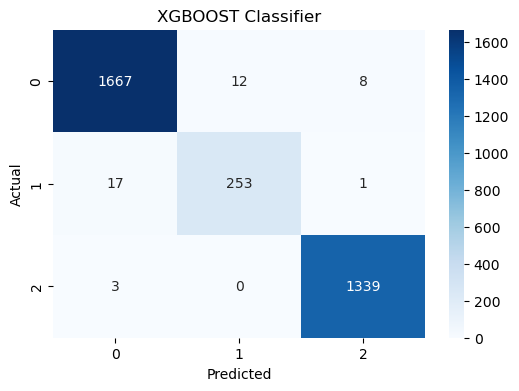

In [21]:
print("accuracy score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBOOST Classifier')
plt.show()

In [22]:
params = {
        "n_estimators" : [100, 200, 300, 500],
        "learning_rate" : [0.01, 0.1],
        "max_depth" : [5,8,12,20,30],
        "colsample_bytree" : [0.3, 0.4, 0.5, 0.8, 1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator= XGBClassifier(), param_grid = params, cv=5, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.963 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.965 total time=   0.0s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.975 total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.976 total time=   0.0s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.964 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.979 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.981 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.984 total time=

In [ ]:
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)
print("accuracy score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBOOST Classifier')
plt.show()